Often times time series data have trends or seasonality or both. Hence, it is advantageous to seperate the components to have more clarity in the analysis and improve to forecasting. The time series $y_t$ can be thought to have three components: trend ($T_t$), seasonal ($S_t$) and noise ($\epsilon_t$). Using these components, the series can be modelled in two ways:
* <b>Additive:</b> $y_t = T_t + S_t + \epsilon_t$
* <b>Multiplicative:</b> $y_t = T_t \times S_t \times \epsilon_t$

Additive model is suitable for time series which trend seems linear and seasonal variations are roughly constant. Multiplicative model is suitable for time series which trend seems non-linear (growing/falling over time) and seasonal variations change proportionally.

The data to be used is the classic air passengers monthly data from year 1949 to 1960. The number of passengers is in thousands.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('dataset/AirPassengers.csv',index_col='Month',parse_dates=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB
None
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


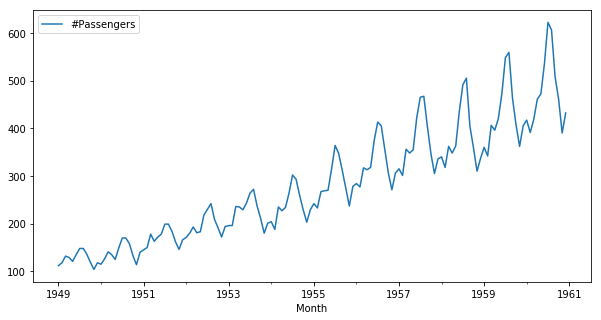

In [8]:
df.plot(figsize=(10,5))

From the image above, it is clear that the series exhibit an upward trend and there is seasonal pattern. The number of passengers peaked during summer period (holiday season). Moreover, the trend and sesonality seems to grow over time. Therefore, multiplicative model will be used. 

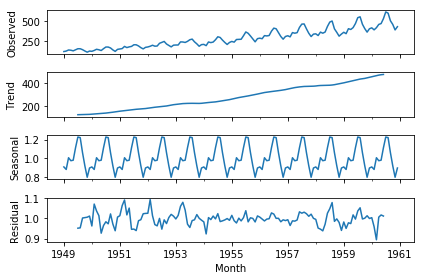

In [19]:
res = seasonal_decompose(df, model='multiplicative') # res.trend, res.seasonal, res.resid
res.plot();

After decompose the time series into the three components, estimating the growth rate of the passengers and the period of the season will be straightforward.